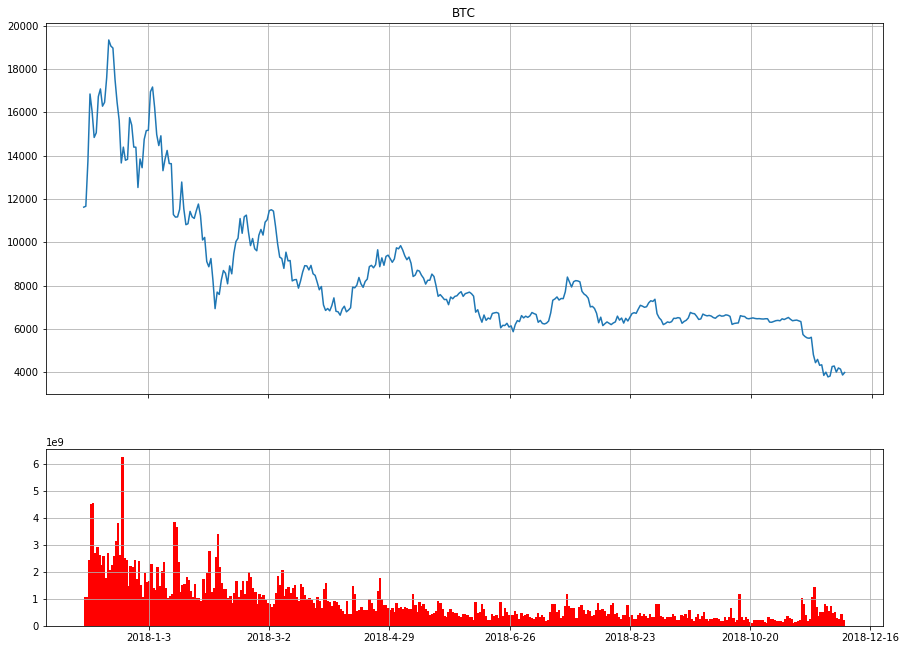

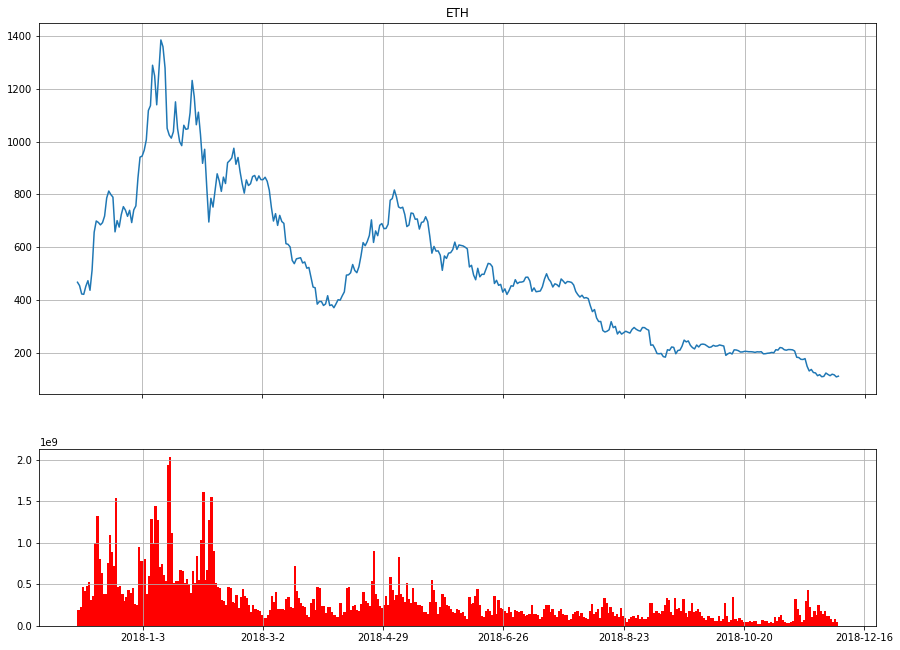

In [183]:
import requests
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid
import numpy as np
from datetime import datetime

#time period of interest, car about the unit
period = '365'
#size of the figure
size = 15

# add what coins you want to fetch data for
coin_list = [ "BTC", "ETH"]
#, "EOS", "LTC", "XLM", "XRP", "NEO", "BNB", "NCASH", "TRAC", "DASH", "XEM", "XRM"]

#add what markets you want the coins to be correlated with
market_list = [ "USD" ]
#, "BTC" ]

time = [ "histoday" ]
# , "histohour", "histominute"]

for j in time:
    for i in market_list:
        for c in coin_list: 
            rcomp = requests.get('https://min-api.cryptocompare.com/data/' + j + '?fsym='+ c +'&tsym=' + i + '&limit=' + period).json()
            response = rcomp['Data']
            close = np.transpose([(response[k]['close'],response[k]['time']) for k in range(0,len(response))])
            vol = np.transpose([(response[k]['volumeto'],response[k]['time']) for k in range(0,len(response))])
            
            plt.figure(figsize=(size,size))
            ax1 = plt.subplot(2,1,1)
            ax1.set_xticklabels([])
            plt.title(c)
            ax1.plot(close[1],close[0])
            ax1.grid()
            ax2 = plt.subplot(4,1,3)
            ax2.bar(vol[1],vol[0],0.1e6,color='red')
            ax2.grid()
            loc, ticks = plt.xticks()
            tmp = [datetime.utcfromtimestamp(x) for x in loc]
            date = [str(y.year) + '-' + str(y.month) + '-' + str(y.day) for y in tmp]
            ax2.set_xticklabels(date)
            plt.show()
#           crypto_data = pd.DataFrame(response)
#          ('/Users/apple/Desktop/crypto_valuation/valuation_scripts/crypto_compare/' + c +'-'+ i + '_' + j + '.csv')